# EDA OF THE OKCUPID USER DATASET

Prateek Garbyal - March 2019

----------

## Summary

1. <b>About the Dataset/Introduction -</b> We will learn about the dataset and take a look at its various features.
2. <b>Cleaning and Wrangling -</b> We will clean the dataset and modify the features for efficient visualization.
3. <b>Plotting/Drawing Inference from the Data -</b> We will analyze the cleaned data and try to answer some interesting questions visually looking at various relationships between the features.
3. <b>Visualizing text data -</b> We will try to visualize the answer essays of people in different groups of features. I also modified the plotting code to allow the user to plot their own custom text visualization by giving them the choice to select what features they want to select.
5. <b>Conclusion</b>

## 1. About the dataset

OkCupid is a popular American-based, internationally operating online dating, friendship, and social networking website that features multiple-choice questions in order to match members.

On May 2016 a dataset of 70,000 OkCupid users was mined and published by a researcher which caused a lot of debate on the ethical issues with Data Science. The data contained very personal information about the users and researchers stated that the user data could be connected to peoples real names with 90% accuracy.

After some ethical and legal issues, the dataset was taken down. The dataset we are going to use today is an anonymized version of the OkCupid dataset. Permission to use this data was explicitly granted by OkCupid.

<b>Why this dataset -</b> I chose this dataset because even the anonymized version has a lot of information from real users which we could use to draw interesting connections between the the features of real people with data visualization (even without using Machine learning!).

I have not used any difficult to understand plots but rather used simple plots which show how EDA can answer interesting questions.

This dataset has 59946 users from San Francisco and 32 of their features.

[Link to the dataset](https://github.com/rudeboybert/JSE_OkCupid)

In [1]:
#Import the Dataset
import pandas as pd
import numpy as np
import re
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from IPython.display import clear_output

STOPWORDS.add('nan')
#read csv
profiles = pd.read_csv('profiles.csv')
profiles

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single
5,29,average,mostly anything,socially,NaN,graduated from college/university,"i'm an australian living in san francisco, but...",building awesome stuff. figuring out what's im...,imagining random shit. laughing at aforementio...,i have a big smile. i also get asked if i'm we...,...,"san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes cats,atheism,m,taurus,no,"english (fluently), chinese (okay)",single
6,32,fit,strictly anything,socially,never,graduated from college/university,life is about the little things. i love to lau...,digging up buried treasure,frolicking<br />\nwitty banter<br />\nusing my...,i am the last unicorn,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,f,virgo,NaN,english,single
7,31,average,mostly anything,socially,never,graduated from college/university,NaN,"writing. meeting new people, spending time wit...","remembering people's birthdays, sending cards,...",i'm rather approachable (a byproduct of being ...,...,"san francisco, california","doesn&rsquo;t have kids, but wants them",straight,likes dogs and likes cats,christianity,f,sagittarius,no,"english, spanish (okay)",single
8,24,NaN,strictly anything,socially,NaN,graduated from college/university,NaN,"oh goodness. at the moment i have 4 jobs, so i...",NaN,i'm freakishly blonde and have the same name a...,...,"belvedere tiburon, california",doesn&rsquo;t have kids,straight,likes dogs and likes cats,christianity but not too serious about it,f,gemini but it doesn&rsquo;t matter,when drinking,english,single
9,37,athletic,mostly anything,not at all,never,working on two-year college,my names jake.<br />\ni'm a creative guy and i...,i have an apartment. i like to explore and che...,i'm good at finding creative solutions to prob...,i'm short,...,"san mateo, california",NaN,straight,likes d

<b>Dataset Features:</b>
* <b>age -</b> age of the user. Range: 18 to 110 (Probably not true!)
    
   
* <b>body_type -</b> rather not say, thin, overweight, skinny, average, fit, athletic, jacked, a little extra, curvy, full figured, used up.


* <b>diet -</b> mostly/strictly; anything, vegetarian, vegan, kosher, halal, other.


* <b>drinks -</b> very often, often, socially, rarely, desperately, not at all.


* <b>drugs -</b> never, sometimes, often.


* <b>education -</b> graduated from, working on, dropped out of; high school, two-year college, university, masters program, law school, med school, Ph.D program, space camp.


* <b>ethnicity -</b> Asian, middle eastern, black, native American, indian, pacific islander, Hispanic/latin, white, other.


* <b>height -</b> inches.


* <b>income -</b> (US $, -1 means rather not say) -1, 20000, 30000, 40000, 50000, 60000 70000, 80000, 100000, 150000, 250000, 500000, 1000000.


* <b>job -</b> student, art/music/writing, banking/finance, administration, technology, construction, education, entertainment/media, management, hospitality, law, medicine, military, politics/government, sales/marketing, science/engineering, transportation, unemployed, other, rather not say, retire.


* <b>offspring -</b> has a kid, has kids, doesnt have a kid, doesn't want kids; ,and/,but might want them, wants them, doesnt want any, doesnt want more.


* <b>orientation -</b> straight, gay, bisexual.


* <b>pets -</b> has dogs, likes dogs, dislikes dogs; and has cats, likes cats, dislikes cats.


* <b>religion -</b> agnosticism, atheism, Christianity, Judaism, Catholicism, Islam, Hinduism, Buddhism, Other; and very serious about it, and somewhat serious about it, but not too serious about it, and laughing about it.


* <b>sex -</b> m, f.


* <b>sign -</b> aquarius, pices, aries, Taurus, Gemini, cancer, leo, virgo, libra, scorpio, saggitarius, Capricorn; but it doesn’t matter, and it matters a lot, and it’s fun to think about.


* <b>smokes -</b> yes, sometimes, when drinking, trying to quit, no.


* <b>speaks -</b> English (fluently, okay, poorly). Afrikaans, Albanian, Arabic, Armenian, Basque, Belarusan, Bengali, Breton, Bulgarian, Catalan, Cebuano, Chechen, Chinese, C++, Croatian, Czech, Danish, Dutch, Esperanto, Estonian, Farsi, Finnish, French, Frisian, Georgian, German, Greek, Gujarati, Ancient Greek, Hawaiian, Hebrew, Hindi, Hungarian, Icelandic, Ilongo, Indonesian, Irish, Italian, Japanese, Khmer, Korean, Latin, Latvian, LISP, Lithuanian, Malay, Maori, Mongolian, Norwegian, Occitan, Other, Persian, Polish, Portuguese, Romanian, Rotuman, Russian, Sanskrit, Sardinian, Serbian, Sign Language, Slovak, Slovenian, Spanish, Swahili, Swedish, Tagalog, Tamil, Thai, Tibetan, Turkish, Ukranian, Urdu, Vietnamese, Welsh, Yiddish (fluently, okay, poorly).


* <b>status -</b> single, seeing someone, married, in an open relationship


* <b>essay0 -</b> My self summary


* <b>essay1 -</b> What I’m doing with my life


* <b>essay2 -</b> I’m really good at


* <b>essay3 -</b> The first thing people usually notice about me


* <b>essay4 -</b> Favorite books, movies, show, music, and food


* <b>essay5 -</b> The six things I could never do without


* <b>essay6 -</b> I spend a lot of time thinking about


* <b>essay7 -</b> On a typical Friday night I am


* <b>essay8 -</b> The most private thing I am willing to admit


* <b>essay9 -</b> You should message me if...

## 2. Cleaning and Wrangling

There are a lot of interesting possibilities for vizualization of this data to see how the features are related. For this project I will try to plot the some of them. I will later modify my code to allow users to select their own features for looking at some interesting plots.  

Before vizualization we need to clean the data as there are too many similar data points in some of the features.

e.g. religion has 46 classes.

In [2]:
#print all unique religions
profiles.religion.unique()

array(['agnosticism and very serious about it',
       'agnosticism but not too serious about it', nan, 'atheism',
       'christianity', 'christianity but not too serious about it',
       'atheism and laughing about it',
       'christianity and very serious about it', 'other', 'catholicism',
       'catholicism but not too serious about it',
       'catholicism and somewhat serious about it',
       'agnosticism and somewhat serious about it',
       'catholicism and laughing about it',
       'agnosticism and laughing about it', 'agnosticism',
       'atheism and somewhat serious about it',
       'buddhism but not too serious about it',
       'other but not too serious about it', 'buddhism',
       'other and laughing about it',
       'judaism but not too serious about it',
       'buddhism and laughing about it',
       'other and somewhat serious about it',
       'other and very serious about it',
       'hinduism but not too serious about it',
       'atheism but not too ser

There are 9 religions (including 'other') and each religion has different seriousness associated with it. For simplicity I will just take the religion part from the class so that we only have 9 classes in the end.

In [3]:
rlist = profiles.religion.tolist()
religions = ['agnosticism','catholicism','christianity', 'atheism','buddhism','other','judaism','hinduism', 'islam']
for x in range(0,len(rlist)):
    if pd.isna(rlist[x]):
        continue
    else:
        for y in religions:
            if y in rlist[x]:
                rlist[x] = y
                break
profiles.drop('religion', axis = 1, inplace = True)
profiles['religion'] = rlist
#print all unique religions after cleaning
profiles['religion'].unique()

array(['agnosticism', nan, 'atheism', 'christianity', 'other',
       'catholicism', 'buddhism', 'judaism', 'hinduism', 'islam'],
      dtype=object)

Similarly there are people with multiple ethnicity so we can just choose the first ethnicity of that person for simplicity

In [4]:
#original unique ethnicities
profiles.ethnicity.unique()

array(['asian, white', 'white', nan, 'asian, black, other',
       'white, other', 'hispanic / latin, white', 'hispanic / latin',
       'pacific islander, white', 'asian', 'black, white',
       'pacific islander', 'asian, native american',
       'asian, pacific islander', 'black, native american, white',
       'middle eastern, other', 'native american, white', 'indian',
       'black', 'black, native american, hispanic / latin, other',
       'black, native american, hispanic / latin',
       'asian, black, pacific islander',
       'asian, middle eastern, black, native american, indian, pacific islander, hispanic / latin, white, other',
       'other', 'hispanic / latin, other', 'asian, black',
       'middle eastern, white', 'native american, white, other',
       'black, native american', 'black, white, other',
       'hispanic / latin, white, other', 'middle eastern', 'black, other',
       'native american, hispanic / latin, white', 'black, indian',
       'indian, white, othe

In [5]:
#for people with miltiple ethnicities select the first one
profiles['ethnicity'] = profiles['ethnicity'].str.split(',').str.get(0)

#unique ethnicities after cleaning
profiles.ethnicity.unique()

array(['asian', 'white', nan, 'hispanic / latin', 'pacific islander',
       'black', 'middle eastern', 'native american', 'indian', 'other'],
      dtype=object)

In [6]:
#similarly for signs
#before cleaning
profiles.sign.unique()

array(['gemini', 'cancer', 'pisces but it doesn&rsquo;t matter', 'pisces',
       'aquarius', 'taurus', 'virgo', 'sagittarius',
       'gemini but it doesn&rsquo;t matter',
       'cancer but it doesn&rsquo;t matter',
       'leo but it doesn&rsquo;t matter', nan,
       'aquarius but it doesn&rsquo;t matter',
       'aries and it&rsquo;s fun to think about',
       'libra but it doesn&rsquo;t matter',
       'pisces and it&rsquo;s fun to think about', 'libra',
       'taurus but it doesn&rsquo;t matter',
       'sagittarius but it doesn&rsquo;t matter',
       'scorpio and it matters a lot',
       'gemini and it&rsquo;s fun to think about',
       'leo and it&rsquo;s fun to think about',
       'cancer and it&rsquo;s fun to think about',
       'libra and it&rsquo;s fun to think about',
       'aquarius and it&rsquo;s fun to think about',
       'virgo but it doesn&rsquo;t matter',
       'scorpio and it&rsquo;s fun to think about',
       'capricorn but it doesn&rsquo;t matter', 'sc

In [7]:
rlist = profiles.sign.tolist()
signs = ['capricorn','sagittarius','scorpio','libra','virgo','leo','cancer', 'gemini','taurus','aries','pisces','aquarius']
for x in range(0,len(rlist)):
    if pd.isna(rlist[x]):
        continue
    else:
        for y in signs:
            if y in rlist[x]:
                rlist[x] = y
                break
profiles.drop('sign', axis = 1, inplace = True)
profiles['sign'] = rlist
#print all unique signs after cleaning
profiles['sign'].unique()

array(['gemini', 'cancer', 'pisces', 'aquarius', 'taurus', 'virgo',
       'sagittarius', 'leo', nan, 'aries', 'libra', 'scorpio',
       'capricorn'], dtype=object)

The essay section has a lot of html tags, '\n' and special characters in the text so I used regular expressions to remove them.

In [8]:
essaylist = ['essay0','essay1','essay2','essay3','essay4','essay5','essay6','essay7','essay8','essay9']
for x in essaylist:
    #Remove html tags from all the essays
    profiles[x] = profiles[x].str.replace('<[^<]+?>', '', regex = True)
    #Remove \n from all the essays
    profiles[x] = profiles[x].str.replace('\n', ' ', regex = False)
    #Remove all special characters from all the essays
    profiles[x] = profiles[x].str.replace("[^0-9A-Za-z']", ' ', regex = True)

## 3. Plotting/Drawing Inference from the Data

Now that the cleaning is done, we can try to answer some interesting questions by plotting the data.

We start by plotting the age distribution for males and females.

/Users/prateekgarbyal/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


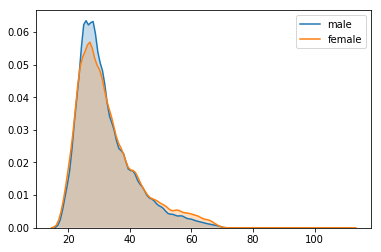

In [9]:
sns.kdeplot(profiles.loc[profiles['sex'] == 'm', 'age'], shade=True, label = 'male')
sns.kdeplot(profiles.loc[profiles['sex'] == 'f', 'age'], shade=True, label = 'female')

* <b> What is the distribution of males and females in the dating pool? :</b> As we can see from the histogram plotted above, the gender distribution is pretty even, with more number of males compared to females in the age range of 20-30

Another interesting way to look at population distribution is the population pyramid which is popularly used on the population data of countries to compare the age distribution with other countries.

As an example I will show a few images of population pyramid of the world and few countries taken from the internet

<img src="1.png" style="width:400px;height:400px;">
<img src="2.png" style="width:400px;height:400px;">
<img src="3.png" style="width:400px;height:400px;">
<img src="4.png" style="width:400px;height:400px;">

We will now plot the population pyramid of people in our dating pool

[Text(0,0.5,'Age-Group'),
 Text(0.5,0,'Population'),
 Text(0.5,1,'Population Pyramid')]

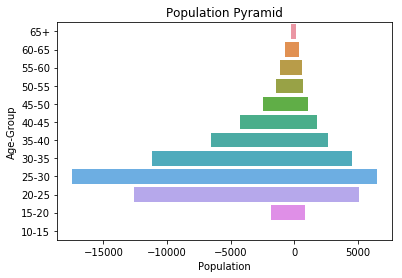

In [10]:
#create bins for setting the range
bins = [10,15,20,25,30,35,40,45,50,55,60,65, np.inf]

#label the ranges
names = ['10-15','15-20','20-25','25-30','30-35','35-40','40-45','45-50','50-55','55-60','60-65','65+']

#divide the age into ranges
profiles['AgeRange'] = pd.cut(profiles['age'], bins, labels=names)

#empty set
x_men = []

#get age range for males
for x in names:
    x_men.append((profiles['AgeRange'] == x).sum())
#set age of men to negative for the population pyramid
x_men = [ -x for x in x_men]

#plot the age of males
barplot = sns.barplot(x = x_men, y=names, order = names[::-1])

#plot the age of females
barplot = sns.countplot(y="AgeRange", data=profiles.loc[profiles['sex'] == 'f'], order = names[::-1])

#label the plot
barplot.set(xlabel="Population", ylabel="Age-Group", title = "Population Pyramid")

As expected, our population pyramid has a very wide base and very thin top. It shows that the dating pool is very young in age, with most people having their age in the range of 25-30

* <b> How many ethnicities are in the dating pool and what is their distribution?</b>

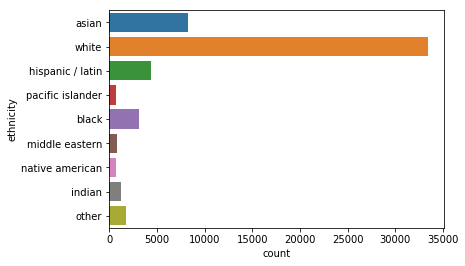

In [11]:
#Barplot showing the value count for each ethnicity
sns.countplot(y="ethnicity", data=profiles)

(-1.1108175670706588, 1.10051512224146, -1.1127524976883119, 1.11331040090048)

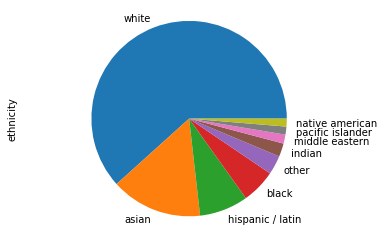

In [12]:
#Pie plot
profiles.ethnicity.value_counts().plot(kind='pie')
plt.axis('equal')

* <b> What is the distribution of people who drink in the dating pool?</b>

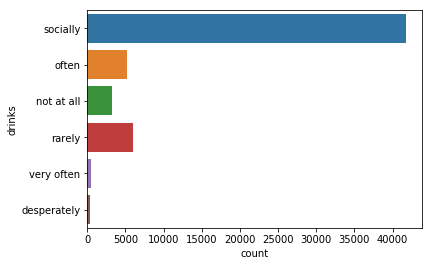

In [13]:
#bar plot
sns.countplot(y="drinks", data=profiles)

(-1.1168097820192988,
 1.1008004664455213,
 -1.1071871176912103,
 1.1191429429951776)

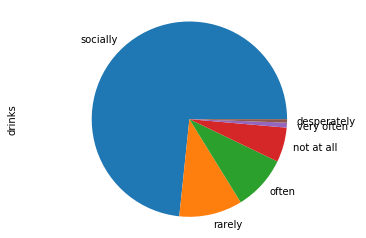

In [14]:
#Pie plot
profiles.drinks.value_counts().plot(kind='pie')
plt.axis('equal')

* <b> What is the distribution of bodytypes in the dating pool?</b>

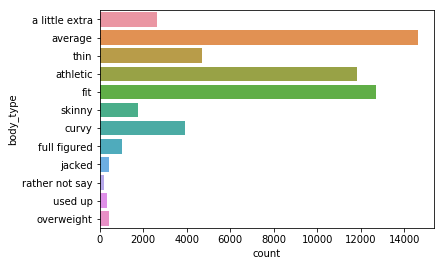

In [15]:
#bar plot
sns.countplot(y="body_type", data=profiles)

(-1.101119575403115,
 1.100053313114434,
 -1.1043767827937878,
 1.1101925160114021)

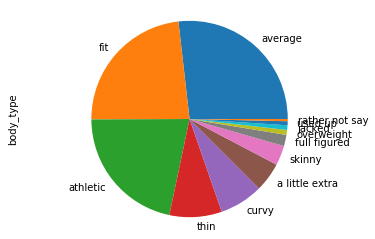

In [16]:
#Pie plot
profiles.body_type.value_counts().plot(kind='pie')
plt.axis('equal')

* <b> Interesting question: does the height of a person determine his bodytype? :</b> Let us look at the same bodytype distribution for people who are greater than equal to 6ft tall.

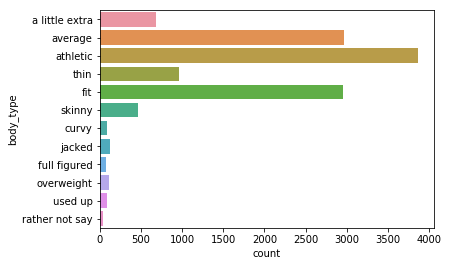

In [17]:
#bar plot
sns.countplot(y="body_type", data = profiles.loc[(profiles['height'] >= 72)])

* <b> An interesting question: Does the drinking habit of an individual effect his bodytype? :</b> I used a percentage stacked barplot for visualizing this answer. I grouped by drinking habits and used percentage instead of absolute values for this plot since some classes have very less frequency in the dataset (e.g. 'very often','desperately') which would cause it to be underrepresented and almost invisible in an absolute plot.

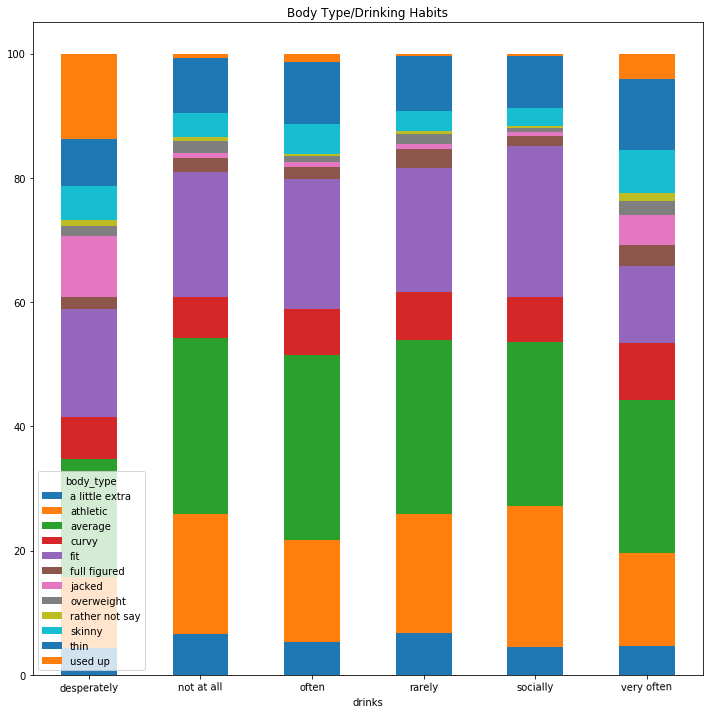

In [18]:
#build and alternate dataframe (had to somehow use 'age' as an anchor)
df_trunc1 = profiles[['drinks','body_type','age']]

#groupby drinks and bodytype
sub_df1=df_trunc1.groupby(['drinks','body_type'])['age'].count()

#unstack to pivot the body_type index as a column
sub_df1 = sub_df1.unstack()

#add a sum column to the dataframe so we can calculate the percentage later
sub_df1['sum'] = sub_df1.sum(axis=1)

#divide by all the elements of the row by the corresponding sum column to get the fraction
sub_df1 = sub_df1.div(sub_df1['sum'],axis = 0)

#multiply the fraction by 100 to get the perecntage values
sub_df1 = sub_df1*100

#drop the sum column as it is not needed
sub_df1.drop('sum', axis=1, inplace = True)

#plot the graph
sub_df1.plot(kind='bar',stacked=True,rot=1,figsize=(12,12),title="Body Type/Drinking Habits")

* <b> Does the religion of a person affect his drinking habits? :</b>

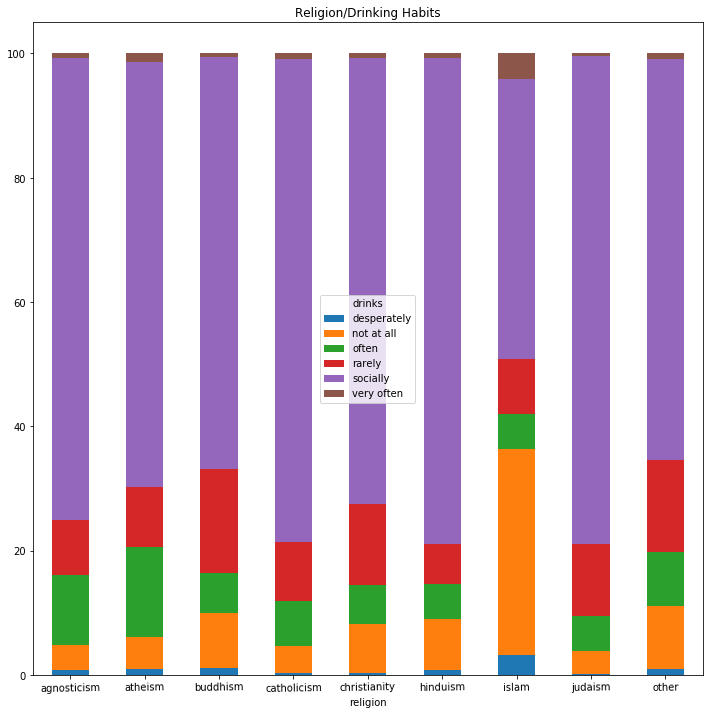

In [19]:
#similar to the above code
df_trunc2 = profiles[['religion','drinks','age']]
sub_df2 = df_trunc2.groupby(['religion','drinks'])['age'].count()
sub_df2 = sub_df2.unstack()
sub_df2['sum'] = sub_df2.sum(axis=1)
sub_df2 = sub_df2.div(sub_df2['sum'],axis = 0)
sub_df2 = sub_df2*100
sub_df2.drop('sum', axis=1,inplace = True)
sub_df2.plot(kind='bar',stacked=True,rot=1,figsize=(12,12),title="Religion/Drinking Habits")

* <b> Does the education level of a person affect his income? :</b>

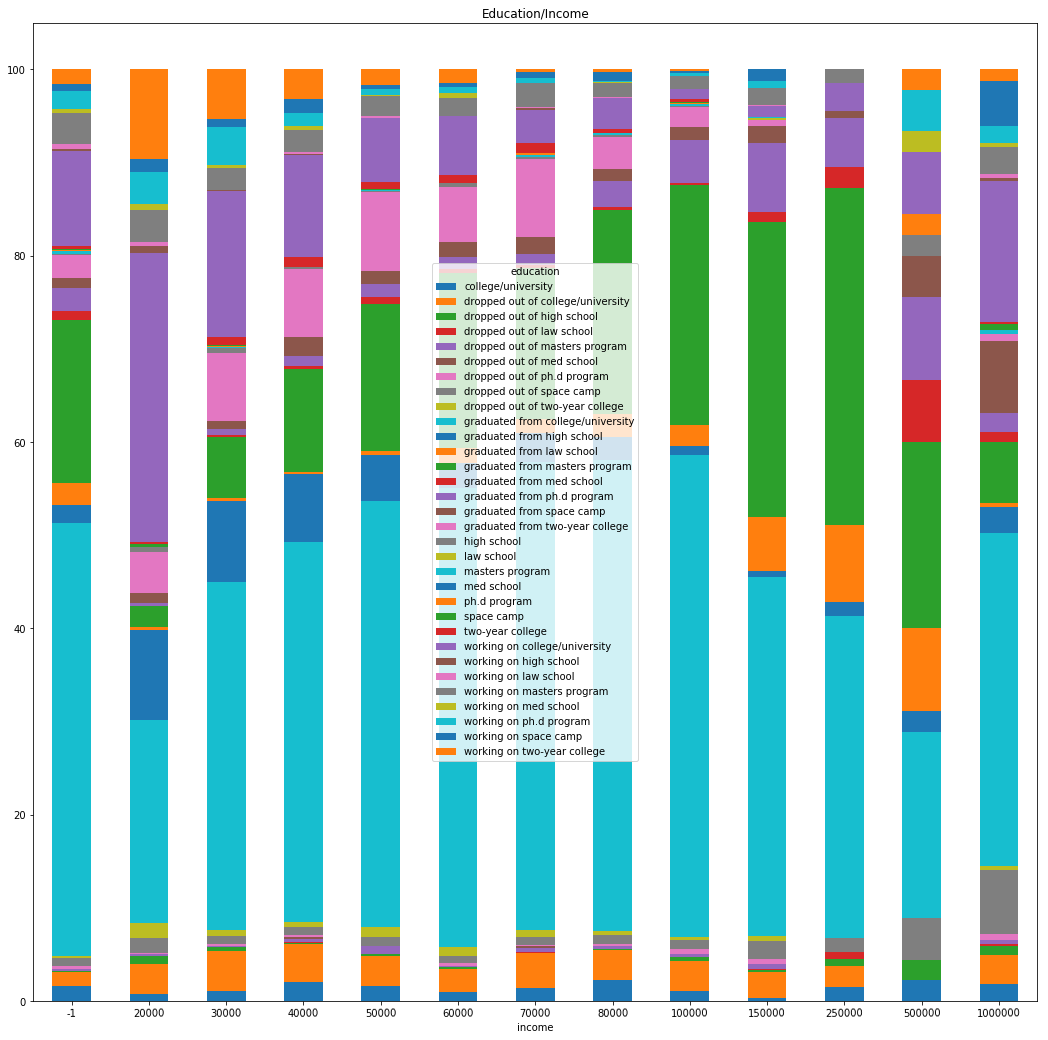

In [20]:
df_trunc2 = profiles[['income','education','age']]
sub_df2 = df_trunc2.groupby(['income','education'])['age'].count()
sub_df2 = sub_df2.unstack()
sub_df2['sum'] = sub_df2.sum(axis=1)
sub_df2 = sub_df2.div(sub_df2['sum'],axis = 0)
sub_df2 = sub_df2*100
sub_df2.drop('sum', axis=1,inplace = True)
sub_df2.plot(kind='bar',stacked=True,rot=1,figsize=(18,18),title="Education/Income")

## 4. Visualizing text data:

* <b>essay0 -</b> My self summary


* <b>essay1 -</b> What I’m doing with my life


* <b>essay2 -</b> I’m really good at


* <b>essay3 -</b> The first thing people usually notice about me


* <b>essay4 -</b> Favorite books, movies, show, music, and food


* <b>essay5 -</b> The six things I could never do without


* <b>essay6 -</b> I spend a lot of time thinking about


* <b>essay7 -</b> On a typical Friday night I am


* <b>essay8 -</b> The most private thing I am willing to admit


* <b>essay9 -</b> You should message me if...


These essay questions have been answered by most of the users, is there a way to visualize the answers of people?

Yes!

We have already cleaned the text data. We can use a word cloud to draw wordcloud of the most occuring words in the answers given by all the people in a group. The size of the word in a wordcloud determines its frequency of occurance in the bag of words of the group of people can filter by features. This can give us very interesting results to compare. For example:

<b> Filter by: ethnicity -> indian -> essay1
basically gives us the wordcloud of answer given by all indians in the dataset for the question 'What I’m doing with my life'</b>
The generated wordcloud is:

<img src="ethnicity_indian_Life" style="width:1000px;height:600px;">


<b>For comparison, filter by: ethnicity -> white -> essay1
The wordcloud for the same essay for all white people in the dataset is:</b>

<img src="ethnicity_white_life" style="width:1000px;height:600px;">


Its an interesting way to compare how people of different ethnicity (indian and white) have a different wordcloud for the answer to the question 'What I’m doing with my life?'. you can even see terms like 'biology', 'medicine', 'developer', 'student' in the indian wordcloud. Similarly People of white ethnicity in this dating pool have terms like 'health', 'cat' etc which goes to show a lot of contrast between the two groups.

<b>I have written a wordcloud script below to allow the user to plot their own custom wordcloud by giving them the choice to select the combination of features and essay questions they want to see the answer wordcloud for.</b>

Run the script below and try to find wordclouds to interesting combinations like:

What do asians do 'On a typical Friday night' compared to the indians.

what do white people answer to what 'I’m really good at' vs what other ethnicities answer.

What do people who take drugs answer to 'I spend a lot of time thinking about'.

In [ ]:
print('Enter column name:')
print(profiles.columns.tolist())
cln = input()
clear_output()

print('Enter column value:')
print(profiles[cln].unique())
clv = input()
clear_output()

print('Enter essay number:')
print('essay0- My self summary')
print('essay1- What I’m doing with my life')
print('essay2- I’m really good at')
print('essay3- The first thing people usually notice about me')
print('essay4- Favorite books, movies, show, music, and food')
print('essay5- The six things I could never do without')
print('essay6- I spend a lot of time thinking about')
print('essay7- On a typical Friday night I am')
print('essay8- The most private thing I am willing to admit')
print('essay9- You should message me if')

en = input()
clear_output()

text = profiles[profiles[cln] == clv][en].values
wordcloud = WordCloud(width = 3000, height = 2000, background_color = 'black', stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(figsize = (40, 30), facecolor = 'k', edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## 5. Conclusion

There are endless questions which can be answered by the capabilities of data visualization. I can't plot all of them but here are some other questions which came to my mind during this EDA! :

<b>Plotting:</b>

* <b> Which zodiac sign people have the highest income?</b>
* <b> Are people more likely to drink if they already smoke?</b>
* <b> Are drug users more likely to be thin?</b>
* <b> Who wants kids more, males or females?</b>
* <b> Do english speaking people have a higher income?</b>
* <b> The distribution of jobs by ethnicity?</b>

<b>WordCloud:</b>

* <b> How the self summary for the ethnicities differ? (essay0)</b>
* <b> What do people of high income do on a weekend vs low income people? (essay7)</b>
* <b> What are men good at vs what are women good at (essay2)</b>
* <b> Do people notice the height for tall people? (essay3)</b>